In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from scipy.stats import linregress


In [2]:
# load data
data = np.genfromtxt('data.txt', dtype ='str')

In [3]:
change = data[:,5].astype(int)

In [4]:
dates = data[:,1].astype(int)
months = data[:,2]
years = data[:,3].astype(int)

C:\Users\Sjoerd Gn\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


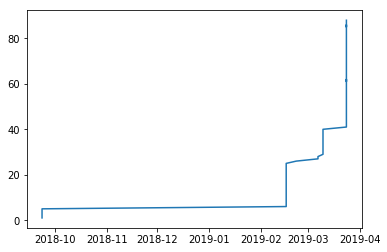

In [5]:
dts = []

# load string data to datetime objects
for i in range(len(change)):
    date = datetime.datetime.strptime(str(dates[i])+' '+str(months[i])+' '+str(years[i]), '%d %B %Y')
    dts.append(date)

# make cumulative data
cum = np.zeros(len(change))
for i in range(len(change)):
    cum[i] = cum[i-1]+change[i]

# change direction: from old to new
dts = dts[::-1]
plt.plot(dts,cum)

base = dts[0]

dts2 = [(dts[i]-base).days for i in range(len(dts))]

dts2 = np.transpose(dts2)[:, np.newaxis]
a, _, _, _ = np.linalg.lstsq(dts2, cum)


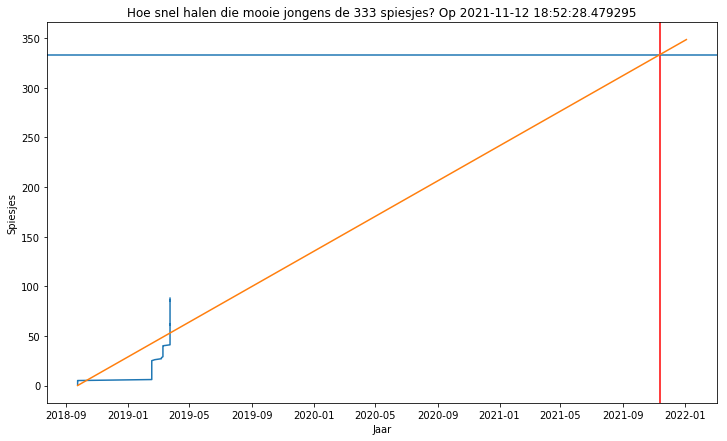

In [6]:
# number of prediction x-values
n = 1200
xarray = np.linspace(0,n,n)

target = 333

# note: this method is really stupid because it calculates 1200 points whereas it could have done with 2. But whatever.
datesarr = np.array([base+datetime.timedelta(days=i) for i in range(n)])

# Calculate intersection with 333 spiesjes
final = (target)/a[0]
finaltime = datetime.timedelta(final)
finaldate = base+finaltime

# Plot
plt.figure(figsize=(12,7))
plt.axvline(x=finaldate, color='r')
plt.axhline(y=target)
plt.plot(dts,cum)
plt.plot(datesarr, a*xarray)
plt.xlabel('Jaar')
plt.ylabel('Spiesjes')
plt.title('Hoe snel halen die mooie jongens de 333 spiesjes? Op {}'.format(finaldate))
plt.savefig('Spiesjes.png')


